In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC


import seaborn as sns
from sklearn.metrics import confusion_matrix


## Ladda in MNIST dataset

In [59]:
mnist = fetch_openml('mnist_784', version=1, cache = True, as_frame = False)
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [60]:
X = mnist["data"]
y= mnist["target"].astype(np.uint8)

## Träning och validering

In [ ]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, random_state=42)


In [62]:
print(f"Träningsdata: {X_train.shape}, Valideringsdata: {X_val.shape}, Testdata: {X_test.shape}")

Träningsdata: (48998, 784), Valideringsdata: (10502, 784), Testdata: (10500, 784)


## Modelling

### Skapa modeller

In [63]:
random_forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)

### Träna modellerna

In [ ]:
random_forest_clf.fit(X_train, y_train)  
sgd_clf.fit(X_train, y_train)


SGDClassifier(random_state=42)

In [65]:
print(random_forest_clf.score(X_val, y_val))
print(sgd_clf.score(X_val, y_val))

0.967339554370596
0.8658350790325652


### Eftersom mina resultat var både bra och dåligt, ville jag gärna testa en till clf.

In [ ]:
# Skalning för SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(float))
X_val_scaled = scaler.transform(X_val.astype(float))


svm_clf = SVC(kernel="rbf", gamma="scale", C=1)
svm_clf.fit(X_train_scaled, y_train)


svm_score = svm_clf.score(X_val_scaled, y_val)
print(f"SVM noggrannhet: {svm_score:.4f}")


SVM noggrannhet: 0.9619


Visualisera RF-resultatet (Då den prestera bäst) , i confusion matrix. Detta hjälper mig även se vart siffror förväxlas. 

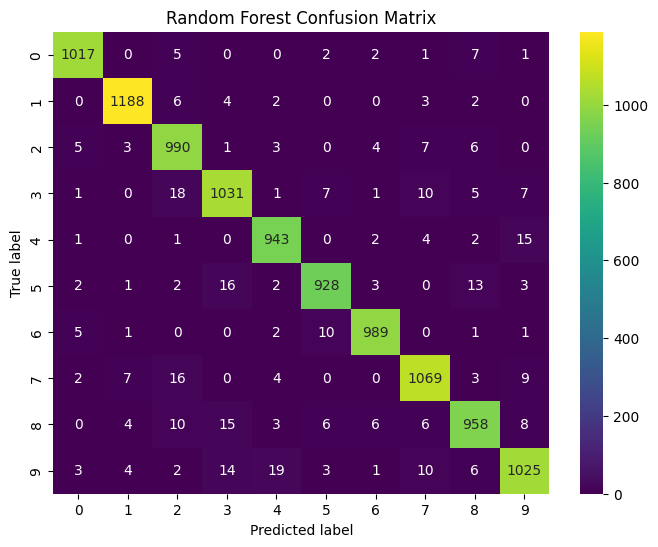

In [ ]:
y_pred = random_forest_clf.predict(X_test)


cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap="viridis", xticklabels=range(10), yticklabels=range(10))

# Titel och etiketter
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Random Forest Confusion Matrix")
plt.show()


## Kontrollerar nogrannhet på test datan.

In [ ]:
test_accuracy = random_forest_clf.score(X_test, y_test)
print(f"Testnogrannhet: {test_accuracy}")

Testnogrannhet: 0.9655238095238096


In [80]:
print(f"Testnogrannhet: {test_accuracy:.4f}")

Testnogrannhet: 0.9655
